### 1. Giriş

Cristiano Ronaldo dos Santos Aveiro, Premier Lig Takımı Manchester United'ta forvet olarak oynayan ve Portekiz milli takımının kaptanlığını yapan Portekizli profesyonel bir futbolcudur. 

Current team: Portugal national football team (#7 / Forward) Trending

Born: February 5, 1985 (age 37 years), Hospital Dr. Nélio Mendonça, Funchal, Portugal

Height: 1.87 m
Partner: Georgina Rodríguez (2017–)
Salary: 26.52 million GBP (2022)
Children: Cristiano Ronaldo Jr., Alana Martina dos Santos Aveiro, Eva Maria Dos Santos, Mateo Ronaldo

### Veri Yükleme

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

In [2]:
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

In [3]:
df=pd.read_csv("D:\G-PYTHON\Python 42\Data science\Data Science Projects\Cristiano Ronaldo ⚽ Goals 📊 EDA, Analysis\Dataset/data.csv")
df_o=pd.read_csv("D:\G-PYTHON\Python 42\Data science\Data Science Projects\Cristiano Ronaldo ⚽ Goals 📊 EDA, Analysis\Dataset/overall.csv")

### Temel Keşif

In [5]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02-Mar,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02-Mar,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02-Mar,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02-Mar,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02-Mar,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            699 non-null    object
 1   Competition       699 non-null    object
 2   Matchday          699 non-null    object
 3   Date              699 non-null    object
 4   Venue             699 non-null    object
 5   Club              699 non-null    object
 6   Opponent          699 non-null    object
 7   Result            699 non-null    object
 8   Playing_Position  642 non-null    object
 9   Minute            699 non-null    object
 10  At_score          699 non-null    object
 11  Type              684 non-null    object
 12  Goal_assist       458 non-null    object
dtypes: object(13)
memory usage: 71.1+ KB


In [7]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
Season,21
Competition,16
Matchday,52
Date,462
Venue,2
Club,4
Opponent,125
Result,51
Playing_Position,6
Minute,107


In [8]:
df.describe(include=['object']).T

,count,unique,top,freq
Season,699,21,14/15,61
Competition,699,16,LaLiga,311
Matchday,699,52,Group Stage,74
Date,699,462,09-12-15,5
Venue,699,2,H,402
Club,699,4,Real Madrid,450
Opponent,699,125,Sevilla FC,27
Result,699,51,3:00,49
Playing_Position,642,5,LW,356
Minute,699,107,90,17


### EDA, Veri Görselleştirme

#### Müsabaka başına gol

In [9]:
px.histogram(
    df,
    x='Competition',
    title="Goals per competition",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Club'])

In [10]:
pd.DataFrame(df.Competition.value_counts())

,Competition
LaLiga,311
UEFA Champions League,140
Premier League,102
Serie A,81
Copa del Rey,22
FA Cup,13
FIFA Club World Cup,7
EFL Cup,4
Supercopa,4
Italy Cup,4


#### Sezon başına gol

In [11]:

px.histogram(
    df,
    x='Season',
    title="Goals per season",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Season','Club'])

#### Kulüp Başına Goller

In [13]:
px.histogram(
    df,
    x='Club',
    title="Goals per Clubs - Seasons",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Season',
    hover_name='Season',
    hover_data=['Competition','Season','Club'])

In [14]:
px.histogram(
    df,
    x='Club',
    title="Goals per Clubs - Competition",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Competition',
    hover_name='Competition',
    hover_data=['Competition','Season','Club'])

#### Oynama Pozisyon Başına Goller

In [15]:
px.histogram(
    df,
    x='Playing_Position',
    title="Goals per playing Position",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

#### Bu grafikten net bir biçimde anlaşıldığı gibi Ronaldo sol kanat pozisyonunda iken Real Madrid takımıyla oldukça etkili olmuş. Ve sayıca fazla gol atmış.

### Gol Tipi

In [21]:
px.histogram(
    df,
    x='Type',
    title="Goals per Type",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

#### Bu grafikten anlaşılacağı üzere sağ ayak ile daha fazla gol atan Ronaldo, kafa ve penaltı vuruşlarında da oldukça fazla gol atmış.

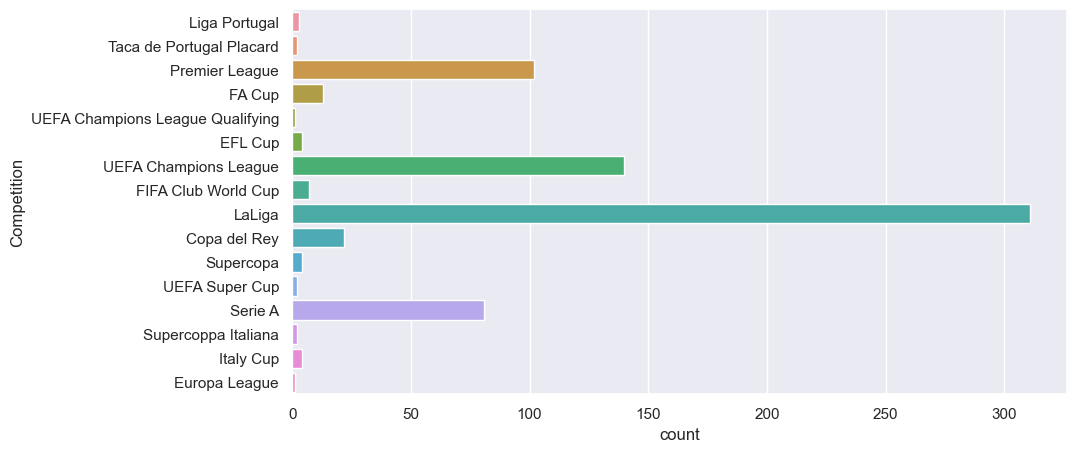

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(y='Competition',data=df)
plt.show()

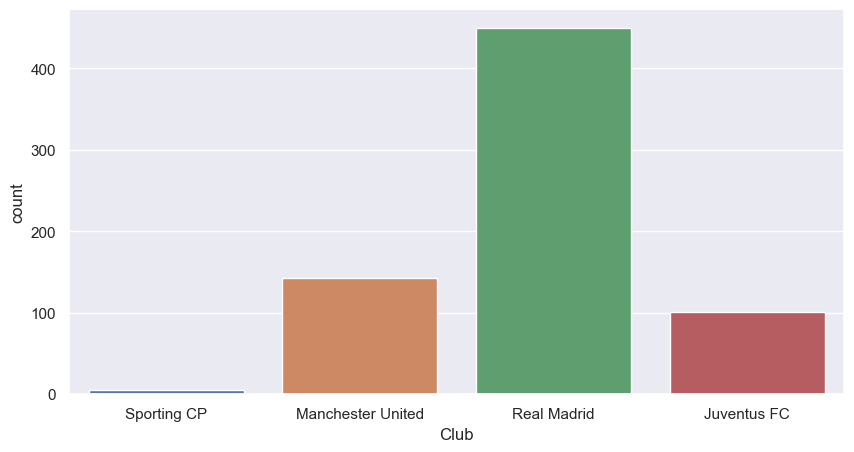

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='Club',data=df)
plt.show()

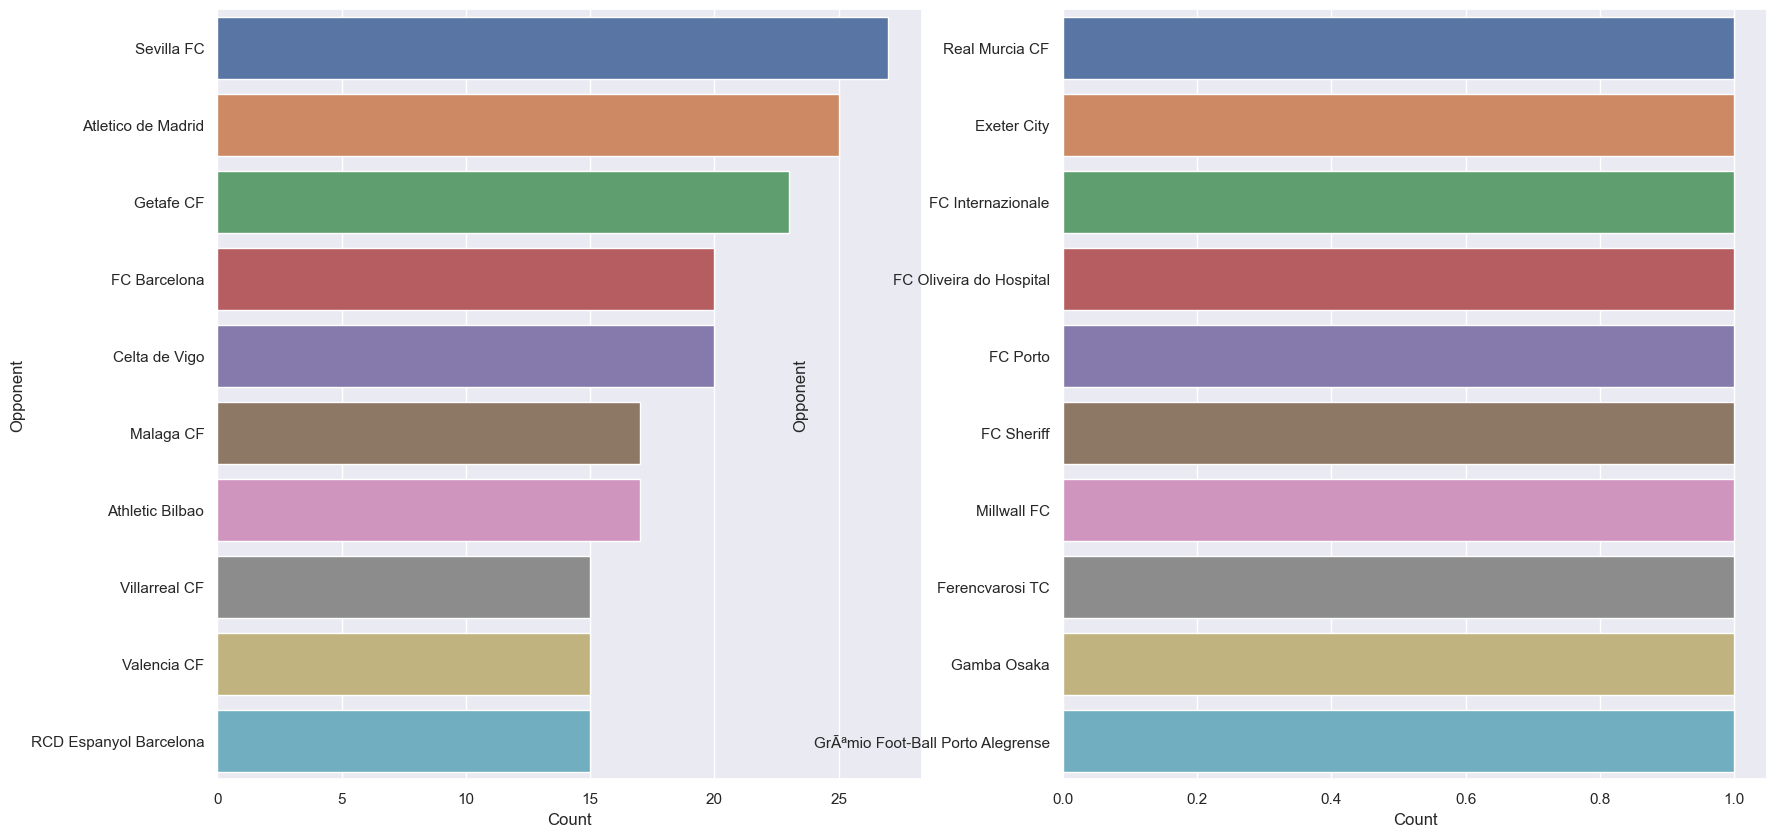

In [35]:
temp = df[['Opponent']]
temp['Count'] = 1
temp = temp.groupby('Opponent').sum()
temp.sort_values('Count',inplace=True,ascending=False)
temp_high = temp.head(10)
temp_low = temp.tail(10)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x=temp_high.Count,y=temp_high.index)
plt.subplot(1,2,2)
sns.barplot(x=temp_low.Count,y=temp_low.index)
plt.show()

In [36]:
# Yukarıdaki grafik bize Ronaldonun en çok gol attığı rakip takımlar hakkında bilgi veriyor

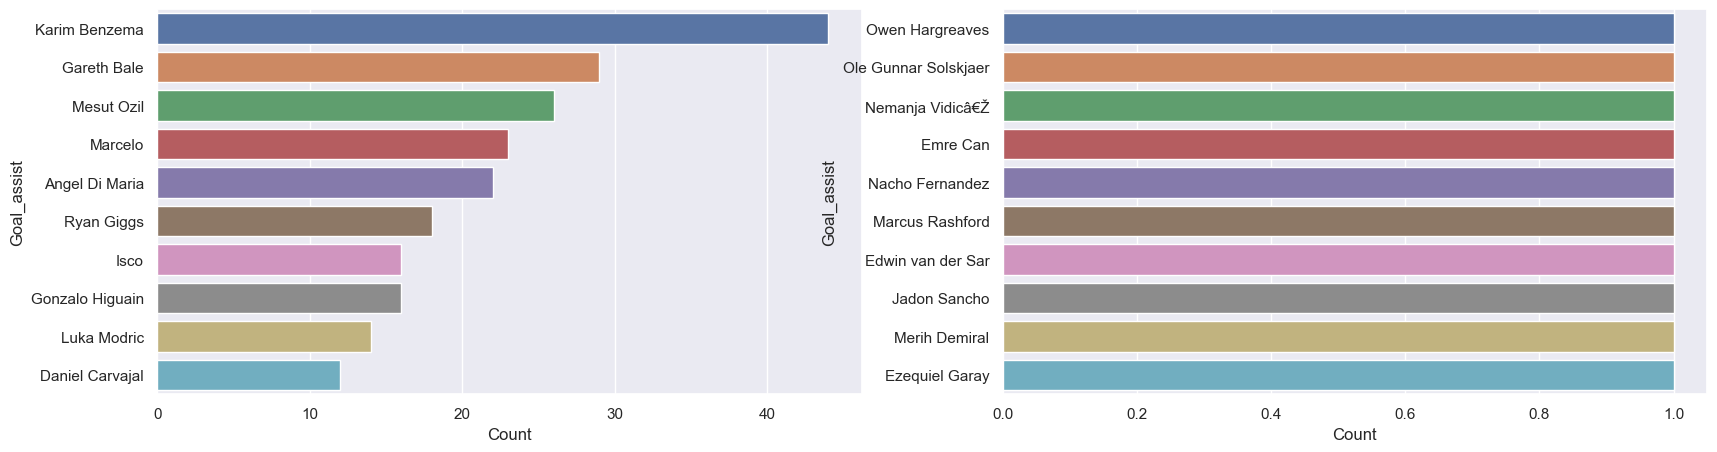

In [37]:
temp = df[['Goal_assist']]
temp['Count'] = 1
temp = temp.groupby('Goal_assist').sum()
temp.sort_values('Count',inplace=True,ascending=False)
temp_high = temp.head(10)
temp_low = temp.tail(10)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x=temp_high.Count,y=temp_high.index)
plt.subplot(1,2,2)
sns.barplot(x=temp_low.Count,y=temp_low.index)
plt.show()

In [38]:
# Yukarıdaki grafik ise asist sayılarını ve en çok asist verdiği oyuncuları gösteriyor.

<BarContainer object of 7 artists>

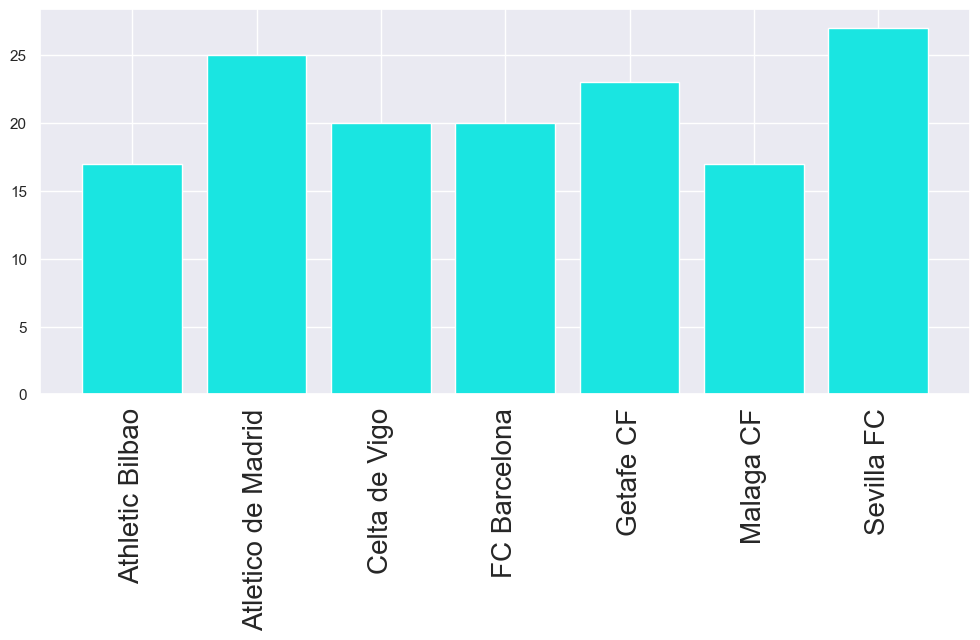

In [40]:
sns.set(rc={'figure.figsize':(12,5)})
opponents_df=df.groupby('Opponent').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.xticks(fontsize=20,rotation='vertical')
plt.bar(x=fav_opponents_df['Opponent'],height=fav_opponents_df['count'],color="#1ae5e1")

#### Ev sahibi - Deplasman golleri

<AxesSubplot:title={'center':'Goals per venue'}, ylabel='Venue'>

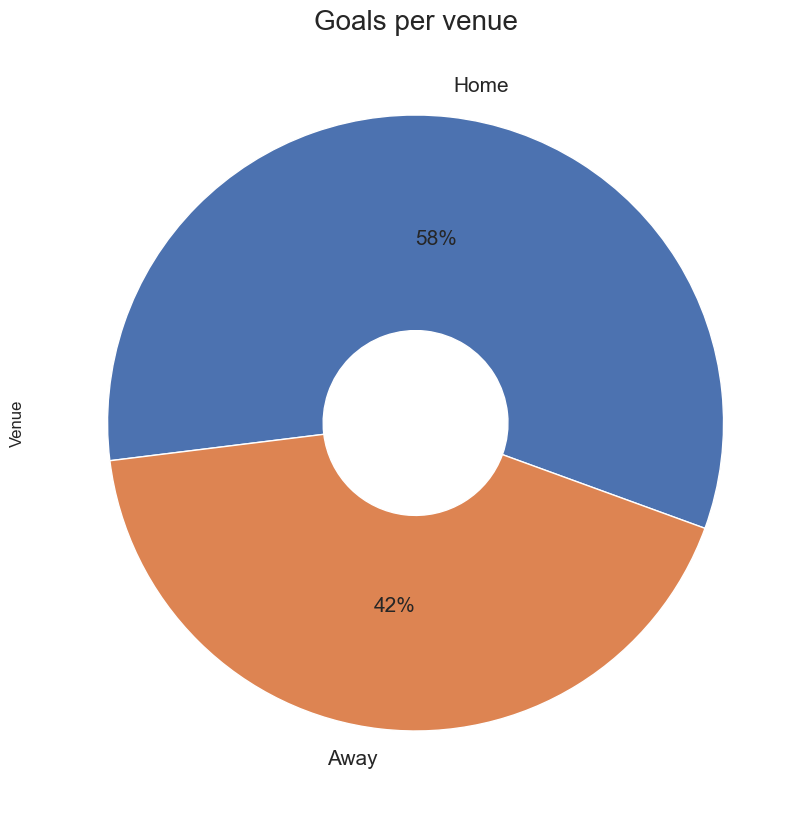

In [41]:
plt.figure(figsize=(30,10))
plt.title('Goals per venue', fontsize=20)
df.Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

#### Kariyer Analizi

Kariyer Maç İstatistikleri

<AxesSubplot:>

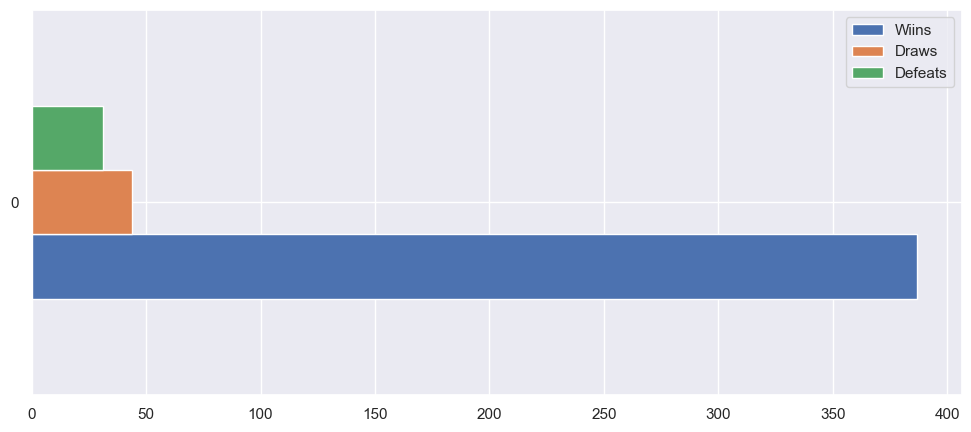

In [42]:
df_o[["Wiins","Draws","Defeats"]].plot(kind = 'barh')

#### Kariyer Hedefleri - Maç kazandıran goller

<AxesSubplot:>

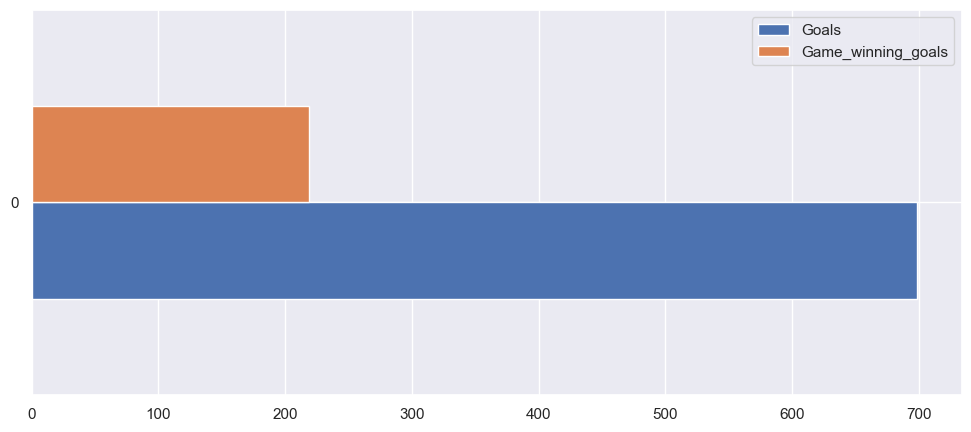

In [43]:
df_o[["Goals","Game_winning_goals"]].plot(kind = 'barh')

#### Hedef Zaman Çizelgesi analizi

Toplam Gol zaman çizelgesi

In [48]:
dfl = df[['Date']]
dfl['Date'] = pd.to_datetime(dfl['Date']).dt.strftime('%y-%m-%d')
dfl['Goal_no']=list(range(1,700))
dfl['Goal']=list(1 for i in range(1,700))
# dfl= dfl.set_index("Date")

In [49]:

trace1 = go.Scatter(x=dfl.Date,
                    y=dfl.Goal_no,
                    name = "CR7 Total Goals Time graph",
                    line = dict(color = 'blue'),
                    opacity = 0.4)

layout = dict(title='CR7 Goals',)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

### Evet veri bilimi yolculuğunda bir projenin daha sonuna geldik. Bu projede benim de çok sevdiğim tarihin en iyi futbolcularından Cristiano Ronaldonun kariyer analizini gerçekleştirdik. Siz de farklı grafikler ve veri setleri ile bu çalışmayı genişletebilirsiniz. Beğenmeyi ve fork etmeyi unutmayın. Sağlıklı günler dilerim.